In [76]:
import astropy.coordinates as coord
from astropy.table import QTable, vstack

import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia
from astroquery.simbad import Simbad
import pandas as pd
import pickle
import os


In [77]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
import pandas as pd 

In [78]:
!whoami

kevin_leo_mcmanus


In [79]:
from fieldstars import fieldstars as fs

In [80]:
fstars = fs('alpha-per vicinity')
fstars.conesearch(52.074625695066345*u.degree, 48.932707471347136*u.degree, 1.0*u.degree, plx_error_thresh=5, r_est=(175,185))

In [81]:
print(fstars.tap_query_string)

SELECT 
		 source_id
		,ra
		,dec
		,parallax
		,pmra
		,pmdec
		,radial_velocity
		,phot_g_mean_mag
		,phot_bp_mean_mag
		,phot_rp_mean_mag
		,r_est
FROM gaiadr2_complements.geometric_distance gd
	INNER JOIN gaiadr2.gaia_source gs using (source_id) 
WHERE 
	CONTAINS(POINT('', gs.ra, gs.dec), 
		CIRCLE('', 52.074625695066345, 48.932707471347136, 1.0)) = 1 
	AND gd.r_est BETWEEN 175 AND 185
	AND parallax_over_error >= 5


In [82]:
fstars.name

'alpha-per vicinity'

In [83]:
len(fstars.objs)

89

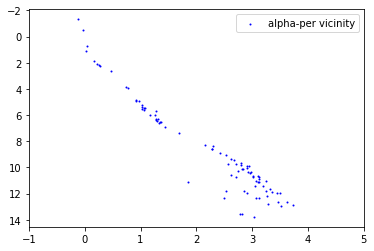

In [84]:
fstars.plot_hrdiagram()

In [85]:
fstars.objs.ra.mean(), fstars.objs.dec.mean()

(51.87527679521976, 48.939076757482255)

In [86]:
clust_c = SkyCoord(ra=52.074625695066345*u.degree, dec =  48.932707471347136*u.degree )

In [87]:
clust_c

<SkyCoord (ICRS): (ra, dec) in deg
    (52.0746257, 48.93270747)>

In [88]:
objs_c = SkyCoord(ra=np.array(fstars.objs.ra)*u.degree, dec=np.array(fstars.objs.dec)*u.degree)

In [89]:
sep = clust_c.separation(objs_c)

In [90]:
zz+plt.hist(sep.value)

NameError: name 'zz' is not defined

In [91]:
from cluster import cluster as cl

In [92]:
alpha_per = cl('alpha_per','./data/J_A+A_628_A66')

In [93]:
alpha_per.objs.head()

,RAdeg,DEdeg,SourceCP,RVCP,e_RVCP,PlxCP,e_PlxCP,GmagCP,pmRACP,e_pmRACP,...,Mode,RV,e_RV,o_RV,rest,b_rest,B_rest,rlen,ResFlag,ModFlag
0,34.813290,52.493074,455075360092433920,-9999.0,-9999.0,5.77091,0.109942,16.5334,27.646,0.350,...,0,0.0,0.0,0,171.669,168.464,174.996,827.580,1,1
1,35.010252,52.664085,455037048980464896,-9999.0,-9999.0,5.63410,1.095480,20.3099,18.664,2.195,...,0,0.0,0.0,0,189.235,149.916,256.777,834.032,1,1
2,35.076013,52.480215,455026156947855872,-9999.0,-9999.0,5.46087,1.454370,20.3340,21.394,3.404,...,0,0.0,0.0,0,211.700,126.050,725.565,828.804,1,1
3,35.095645,48.516677,355242590505237888,-9999.0,-9999.0,5.89340,0.077502,15.8404,27.676,0.134,...,0,0.0,0.0,0,167.334,165.175,169.549,686.124,1,1
4,35.202351,49.437643,355343947436467200,-9999.0,-9999.0,5.82667,0.286555,17.6887,36.234,0.626,...,1,0.0,0.0,0,170.884,162.705,179.914,721.461,1,1


In [94]:
alpha_per.objs.columns

Index(['RAdeg', 'DEdeg', 'SourceCP', 'RVCP', 'e_RVCP', 'PlxCP', 'e_PlxCP',
       'GmagCP', 'pmRACP', 'e_pmRACP', 'pmDECP', 'e_pmDECP', 'bx', 'by', 'bz',
       'vx', 'vy', 'vz', 'c', 'distC', 'Source', 'Plx', 'e_Plx', 'pmRA',
       'e_pmRA', 'pmDE', 'e_pmDE', 'RADEcor', 'RAPlxcor', 'RApmRAcor',
       'RApmDEcor', 'DEPlxcor', 'DEpmRAcor', 'DEpmDEcor', 'PlxpmRAcor',
       'PlxpmDEcor', 'pmRApmDEcor', 'NAL', 'NAC', 'NgAL', 'NbAL', 'gofAL',
       'chi2AL', 'epsi', 'sepsi', 'Solved', 'APF', 'WAL', 'pscol', 'e_pscol',
       'fvarpi', 'MatchObsA', 'Nper', 'amax', 'MatchObs', 'Dup', 'o_Gmag',
       'FG', 'e_FG', 'RFG', 'Gmag', 'o_BPmag', 'FBP', 'e_FBP', 'RFBP', 'BPmag',
       'o_RPmag', 'FRP', 'e_FRP', 'RFRP', 'RPmag', 'E(BR/RP)', 'Mode', 'RV',
       'e_RV', 'o_RV', 'rest', 'b_rest', 'B_rest', 'rlen', 'ResFlag',
       'ModFlag'],
      dtype='object')

In [95]:
colmapper= {'source_id':'SourceCP', 'ra':'RAdeg', 'dec':'DEdeg','parallax':'Plx',
            'pmra':'pmRA', 'pmdec':'pmDE', 'radial_velocity':'RVCP',
            'phot_g_mean_mag':'Gmag', 'phot_bp_mean_mag':'BPmag', 'phot_rp_mean_mag':'RPmag','r_est':'rest'}

In [96]:
[k for k in colmapper.values()]

['SourceCP',
 'RAdeg',
 'DEdeg',
 'Plx',
 'pmRA',
 'pmDE',
 'RVCP',
 'Gmag',
 'BPmag',
 'RPmag',
 'rest']

```
def from_pandas(df, colmapper, name=None):

    my_fs = fs(name=name)
    src_cols = [c for c in colmapper.values()]
    dest_cols = [c for c in colmapper.keys()]

    arg_df = df.reset_index()

    inv_cols = set(src_cols).difference(arg_df.columns)
    if len(inv_cols) != 0:
        raise ValueError('invalid source column(s): '+str(inv_cols))
    # case 1: too few dest columns given
    missing_cols = set(__column_list).difference(dest_cols)
    if len(missing_cols) != 0:
        raise ValueError('Missing column mapping for: '+str(missinig_columns))
    # case 2: too many dest columns given:
    extra_cols = set(dest_cols).difference(__column_list)
    if len(extra_cols) != 0:
        raise ValueError('Invalid destination column supplied: '+str(extra_cols))
    #swap the keys and values for purposes of renaming:
    col_renamer = {s:d for s,d in zip(src_cols, dest_cols)}
    my_fs.objs = arg_df[src_cols].rename(columns = col_renamer, copy=True)

    my_fs.objs.set_index('source_id', inplace=True)
    return my_fs
```

In [97]:
new_fs = from_pandas(alpha_per.objs, colmapper, 'new')

In [98]:
new_fs.objs.head()

,ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,r_est
source_id,,,,,,,,,,
455075360092433920,34.813290,52.493074,5.7999,27.646,-19.901,-9999.0,16.5334,18.378500,15.233000,171.669
455037048980464896,35.010252,52.664085,5.6581,18.664,-20.069,-9999.0,20.3099,21.707800,18.835100,189.235
455026156947855872,35.076013,52.480215,5.4758,21.394,-2.636,-9999.0,20.3340,21.061501,19.076401,211.700
355242590505237888,35.095645,48.516677,5.9488,27.676,-19.837,-9999.0,15.8404,17.374001,14.629200,167.334
355343947436467200,35.202351,49.437643,5.8477,36.234,-24.237,-9999.0,17.6887,19.016600,16.304399,170.884


In [99]:
alpha_per.objs.head()

,RAdeg,DEdeg,SourceCP,RVCP,e_RVCP,PlxCP,e_PlxCP,GmagCP,pmRACP,e_pmRACP,...,Mode,RV,e_RV,o_RV,rest,b_rest,B_rest,rlen,ResFlag,ModFlag
0,34.813290,52.493074,455075360092433920,-9999.0,-9999.0,5.77091,0.109942,16.5334,27.646,0.350,...,0,0.0,0.0,0,171.669,168.464,174.996,827.580,1,1
1,35.010252,52.664085,455037048980464896,-9999.0,-9999.0,5.63410,1.095480,20.3099,18.664,2.195,...,0,0.0,0.0,0,189.235,149.916,256.777,834.032,1,1
2,35.076013,52.480215,455026156947855872,-9999.0,-9999.0,5.46087,1.454370,20.3340,21.394,3.404,...,0,0.0,0.0,0,211.700,126.050,725.565,828.804,1,1
3,35.095645,48.516677,355242590505237888,-9999.0,-9999.0,5.89340,0.077502,15.8404,27.676,0.134,...,0,0.0,0.0,0,167.334,165.175,169.549,686.124,1,1
4,35.202351,49.437643,355343947436467200,-9999.0,-9999.0,5.82667,0.286555,17.6887,36.234,0.626,...,1,0.0,0.0,0,170.884,162.705,179.914,721.461,1,1


In [100]:
new_fs.name

'new'